In [2]:
import pandas as pd 
import numpy as np 

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
import matplotlib.patheffects as path_effects
import seaborn as sns


from PIL import Image
import requests
from io import BytesIO

In [12]:
data = pd.read_csv("Barcelon-Galatasaray-Defensive-Actions.csv",sep=';' ,encoding='latin-1')

In [13]:
datadef = data.copy()
datadef.head()

,Player,Team,#,Nation,Pos,Age,Min,Tkl-Tot,Tkl-Wn,Def3rd-Tkl,...,Mid3rd-Pres,Att3rd-Pres,Blocks-Ball,Sh-Blocks,ShSv,Blocks-Pass,Interceptions,Tkl+Int,Clear,Err
0,Berkan Kutlu,Galatasaray,22,TUR,DM,24-044,90,4,1,2,...,16,3,5,1,0,4,2,6,2,0
1,Taylan Antalyali,Galatasaray,4,TUR,DM,27-061,90,2,0,2,...,5,0,1,0,0,1,2,4,3,0
2,Kerem Aktürkoglu,Galatasaray,7,TUR,AM,23-140,89,1,0,0,...,7,1,2,0,0,2,0,1,0,0
3,Sacha Boey,Galatasaray,93,FRA,RB,21-178,90,7,4,4,...,3,0,4,2,0,2,0,7,8,0
4,Mostafa Mohamed,Galatasaray,11,EGY,FW,24-102,67,1,1,0,...,8,7,1,0,0,1,0,1,0,0


# Barcelona vs Galatasaray Match Defensive Action Data

The descriptions of the data columns are as follows: 

> **Player** : home and away team players

> **Team** : Home or Away Team 

> **Nation** : Country

> **Pos**: Position


> **Age** : Player's age


> **Min** : Minute


> **Tkl-Tot** : Total Tackle


> **Tkl-Wn** : Tackle Won


> **Def3rd-Tkl** : Tackle in Defensive 3rd


> **Mid3rd-Tkl** : Tackle in Middle 3rd


> **Att3rd-Tkl** : Tackle in Attacking 3rd


> **Tkl-Dribb** : Tackled in Dribbles


> **Att-Dribb** : Attampted Tackle in Dribbles


> **Past-Dribb**: Tackled in Dribbles Past


> **Press-Tot** : Total Pressure


> **Press-Suc** : Successfull Pressure


> **%** : Pressure Percentage


> **Def3rd-Pres** : Pressure in Defensive 3rd


> **Mid3rd-Pres** : Pressure in Middle 3rd


> **Att3rd-Pres** : Pressure in Attacking 3rd


> **Blocks-Ball** : Ball Blocks


> **Sh-Block** : Shot Blocks


> **Blocks-Pass** : Pass Blocks


> **Interceptions**: Interceptions


> **Tkl+Int** : Tackle and Interceptions


> **Clear** : Clearances


> **Error** : Error

In [14]:
datadef.shape

(31, 30)

In [15]:
datadef.describe().T

,count,mean,std,min,25%,50%,75%,max
#,31.0,22.709677,22.933518,1.0,7.0,18.0,25.5,93.0
Min,31.0,63.870968,29.458153,1.0,45.0,78.0,90.0,90.0
Tkl-Tot,31.0,1.129032,1.565076,0.0,0.0,1.0,1.5,7.0
Tkl-Wn,31.0,0.516129,0.961629,0.0,0.0,0.0,1.0,4.0
Def3rd-Tkl,31.0,0.645161,1.050346,0.0,0.0,0.0,1.0,4.0
Mid3rd-Tkl,31.0,0.354839,0.754912,0.0,0.0,0.0,0.0,3.0
Att3rd-Tkl,31.0,0.129032,0.340777,0.0,0.0,0.0,0.0,1.0
Tkl-Dribb,31.0,0.516129,0.889605,0.0,0.0,0.0,1.0,4.0
Att-Dribb,31.0,1.225806,1.802030,0.0,0.0,1.0,1.5,8.0
Tkl%-Dripples,17.0,49.317647,42.993360,0.0,0.0,50.0,100.0,100.0


In [18]:
datapress= datadef.sort_values(by=['Press-Tot'],ascending=False)

In [22]:
datapressh = datapress[datapress['Press-Tot']>=10]


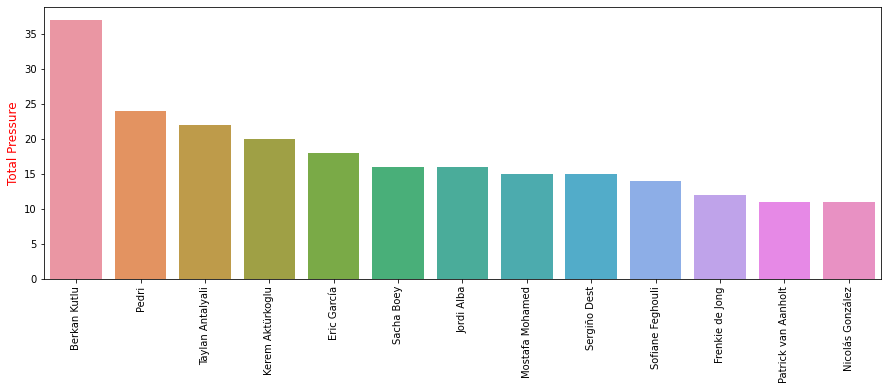

In [25]:
plt.figure(figsize=(15,5));
bar_ap = sns.barplot(data =datapressh, x='Player', y='Press-Tot',linewidth=0.2)
bar_ap.set_xticklabels(bar_ap.get_xticklabels(), rotation=90)
plt.ylabel("Total Pressure",fontsize = 12,color="red" );
plt.xlabel("",fontsize = 12 , color = 'green');
plt.show()

<Figure size 1080x720 with 0 Axes>

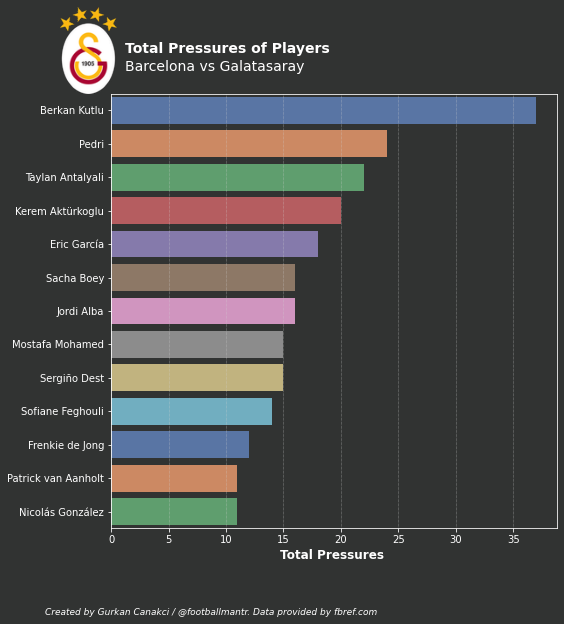

In [219]:
background = "#313332"
text_color = "w"
title_font="Alegreya Sans"


plt.figure(figsize=(15,10))
fig, ax = plt.subplots(figsize=(8,8))
ax.patch.set_facecolor(background)
fig.set_facecolor(background)

ax.grid(ls="dotted",lw=0.5,color="lightgrey",zorder=1)


ax = sns.barplot(data =datapressh, x='Press-Tot', y='Player',linewidth=0.1,orient = 'h',palette="deep")
bar_ap.set_xticklabels(bar_ap.get_xticklabels(), rotation=90)
plt.ylabel("",fontsize = 12,color="red" );
plt.xlabel("Total Pressures ",fontsize = 12 , color = text_color,fontweight="bold");

fig.text(0.15,0.95,"Total Pressures of Players ", fontsize=14, fontweight="bold",color=text_color,fontfamily=title_font)
fig.text(0.15,0.92,"Barcelona vs Galatasaray",fontweight="regular", fontsize=14,color = text_color,fontfamily=title_font)

ax2 = fig.add_axes([0.01,0.88,0.15,0.15]) # badge
ax2.axis("off")
url = "https://upload.wikimedia.org/wikipedia/commons/3/37/Galatasaray_Star_Logo.png"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

basewidth = 100
wpercent = (basewidth / float(img.size[0]))
hsize = int((float(img.size[1]) * float(wpercent)))
img = img.resize((basewidth, hsize), Image.ANTIALIAS)


baseheight = 100
hpercent = (baseheight / float(img.size[1]))
wsize = int((float(img.size[0]) * float(hpercent)))
img = img.resize((wsize, baseheight), Image.ANTIALIAS)


ax2.imshow(img)

fig.text(0.01, -0.025, "Created by Gurkan Canakci / @footballmantr. Data provided by fbref.com",
        fontstyle="italic",fontsize=9, fontfamily=body_font, color=text_color)


plt.show()

<Figure size 1080x720 with 0 Axes>

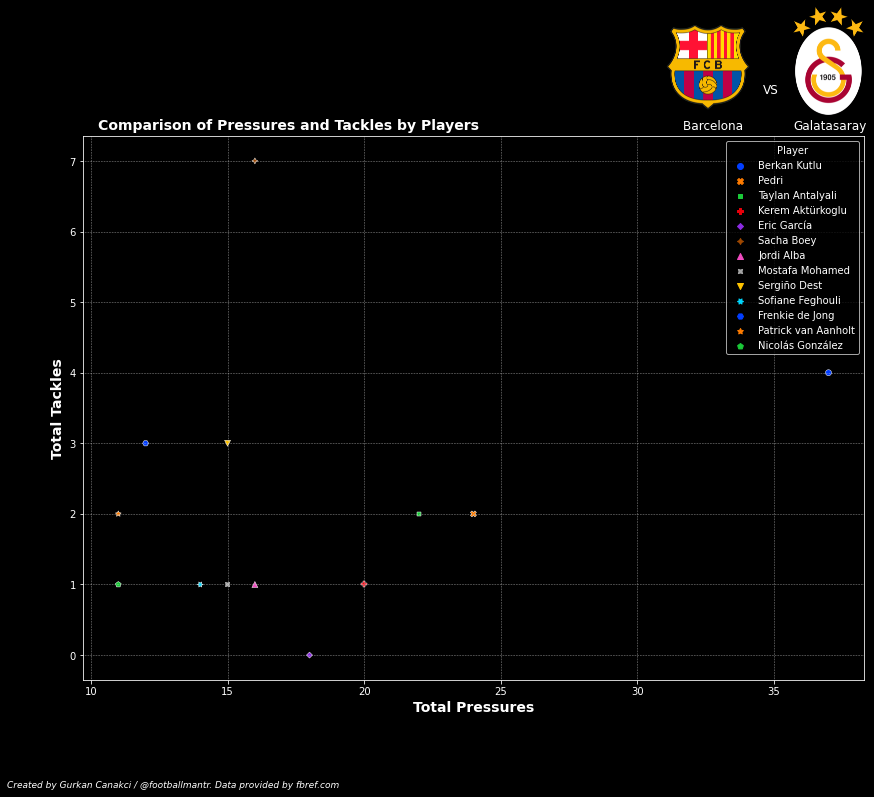

In [348]:
background = "#313332"
text_color = "w"
title_font="Alegreya Sans"


plt.figure(figsize=(15,10))
fig, ax = plt.subplots(figsize=(14,10))



mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color


ax.grid(ls="dotted",lw=0.6,color="lightgrey",zorder=1)

plt.style.use('dark_background')
sns.scatterplot(data=datapressh, x="Press-Tot",y ="Tkl-Tot",hue="Player", sizes=(100, 300),style="Player",palette = "bright",legend=True,alpha = 1)


fig.text(0.14,0.89,"Comparison of Pressures and Tackles by Players", fontsize=14, fontweight="bold",color=text_color,fontfamily=title_font)        
fig.text(0.72,0.89,"Barcelona ",fontweight="regular", fontsize=12,color = text_color,fontfamily=title_font)
fig.text(0.8,0.94,"VS",fontweight="regular", fontsize=12,color = text_color,fontfamily=title_font)
fig.text(0.83,0.89,"Galatasaray",fontweight="regular", fontsize=12,color = text_color,fontfamily=title_font)


# adding x and y labels
ax.set_xlabel("Total Pressures", fontweight="bold", fontsize=14,color= text_color,fontfamily=title_font)
ax.set_ylabel("Total Tackles", fontweight="bold", fontsize= 14,color=text_color,fontfamily=title_font)

fig.text(0.05, -0.025, "Created by Gurkan Canakci / @footballmantr. Data provided by fbref.com",
        fontstyle="italic",fontsize=9, fontfamily=body_font, color=text_color)

ax2 = fig.add_axes([0.79,0.91,0.15,0.15]) # badge
ax2.axis("off")
url = "https://upload.wikimedia.org/wikipedia/commons/3/37/Galatasaray_Star_Logo.png"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
ax2.imshow(img)
ax2.figsize = (3,1)

ax3 = fig.add_axes([0.67,0.9,0.15,0.15]) # badge
ax3.axis("off")
url = "https://marka-logo.com/wp-content/uploads/2020/04/Barcelona-Logo.png"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
ax3.imshow(img)
ax3.figsize =(5,5)

plt.show()

# Oyuncuların Pres ve Top Kapma Aksiyonları

Galatasaray takımında pres aksiyonlarında en fazla Berkan Kutlu yer almış.
Sonrasında Taylan Antalyalı ve Kerem Akturkoglu bu pres aksiyonlarına katılmış.

Top kapma girişiminde Sacha Boey 7 kez bulunurak çok iyi bir rakam yakalamış.
Yine Berkan top kapma girişimlerinde de oldukça iyi bir performans sergilemiş.


Barcelona takımında ise pres aksiyonlarında Pedri ön plana çıkarken Frankie De Jong ile Sergino Dest yeterli pres aksiyonlarında bulunmamış.

Top kapma girişiminde De Jong ve Dest 3 kez girişimde bulunmuş.
Pedri ise yine 2 kez top kapma girişiminde bulunmuş.


In [285]:
datags = datadef[datadef.Team == "Galatasaray"]
datags.head()

,Player,Team,#,Nation,Pos,Age,Min,Tkl-Tot,Tkl-Wn,Def3rd-Tkl,...,Mid3rd-Pres,Att3rd-Pres,Blocks-Ball,Sh-Blocks,ShSv,Blocks-Pass,Interceptions,Tkl+Int,Clear,Err
0,Berkan Kutlu,Galatasaray,22,TUR,DM,24-044,90,4,1,2,...,16,3,5,1,0,4,2,6,2,0
1,Taylan Antalyali,Galatasaray,4,TUR,DM,27-061,90,2,0,2,...,5,0,1,0,0,1,2,4,3,0
2,Kerem Aktürkoglu,Galatasaray,7,TUR,AM,23-140,89,1,0,0,...,7,1,2,0,0,2,0,1,0,0
3,Sacha Boey,Galatasaray,93,FRA,RB,21-178,90,7,4,4,...,3,0,4,2,0,2,0,7,8,0
4,Mostafa Mohamed,Galatasaray,11,EGY,FW,24-102,67,1,1,0,...,8,7,1,0,0,1,0,1,0,0


In [295]:
datagstkl = datags[datags['Tkl+Int']>=2]

<Figure size 1080x720 with 0 Axes>

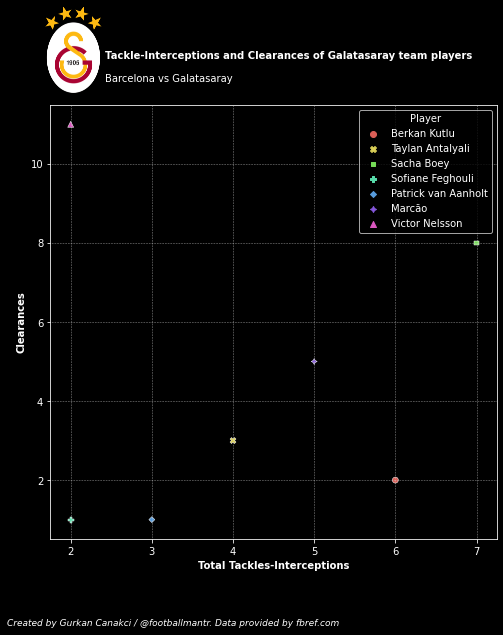

In [345]:
background = "#FFFFFF"
text_color = "w"
title_font="Alegreya Sans"

plt.figure(figsize=(15,10))
ax.patch.set_facecolor(background)
fig.set_facecolor(background)

fig, ax = plt.subplots(figsize=(8,8))
ax.grid(ls="dotted",lw=0.6,color="lightgrey",zorder=1)

sns.scatterplot(data=datagstkl, x="Tkl+Int",y ="Clear",hue="Player",style="Player",palette = "hls",legend=True,alpha = 1)

fig.text(0.22,0.96,"Tackle-Interceptions and Clearances of Galatasaray team players ", fontsize=10, fontweight="bold",color=text_color,fontfamily=title_font)        
fig.text(0.22,0.92,"Barcelona vs Galatasaray",fontweight="regular", fontsize=10,color = text_color,fontfamily=title_font)


# adding x and y labels
ax.set_xlabel("Total Tackles-Interceptions", fontweight="bold", fontsize=10,color= text_color,fontfamily=title_font)
ax.set_ylabel("Clearances", fontweight="bold", fontsize= 10,color=text_color,fontfamily=title_font)

fig.text(0.05, -0.025, "Created by Gurkan Canakci / @footballmantr. Data provided by fbref.com",
        fontstyle="italic",fontsize=9, fontfamily=body_font, color=text_color)

ax2 = fig.add_axes([0.09,0.90,0.15,0.15]) # badge
ax2.axis("off")
url = "https://upload.wikimedia.org/wikipedia/commons/3/37/Galatasaray_Star_Logo.png"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
ax2.imshow(img)
ax2.figsize = (3,1)


# Net Müdahale ve Savunma Rakamları

Barcelona- Galatasaray karşılaşmasında Sacha Boey hem topa müdahalesi hem de savunma rakamlarında inanılmaz bir performans sergilemiş.

Victor Nelsson topa müdalesi bu maç özelinde az olsa da savunmada özellikle son müdahaleleri ile birlikte gerçekten iyi pozisyon aldığını görebiliyoruz. 

Berkan Kutlu yine top kapma-müdahale oranlarında iyi bir ortalama yakalamış. Bu durum aslında bir orta saha oyuncusunda beklenilen bir durumdur.

Marcao hem topa müdahaleleri hem de ceza sahası içerisinde savunmada yaptığı hamlelerle yine çok iyi bir performans ortaya koymuş.

Temel anlamda şunu belirtebiliriz ki Galatasaray takımında Sacha Boey, Marcao, Berkan ve Nellson savunma anlamında maça damga vurmuşlar diyebiliriz.